In [50]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd
import statsmodels.stats.api as sms

# estabelecemos a conexão ao MetaTrader 5
if not mt5.initialize(path="C:\Program Files\MetaTrader 5\\terminal64.exe"):
    print("initialize() failed, error code =", mt5.last_error())
    quit()
    

coef = 0.00746350377330673
intercept = 0.27450383730253236
media =1.4506914188435379e-16
dp =0.004943714117496676


def intervalPrediction(dependente, independente, coef, intercept, m, d):
    df = pd.DataFrame()
    dep = mt5.copy_rates_from_pos(dependente, mt5.TIMEFRAME_M30, 1,2400)
    indep = mt5.copy_rates_from_pos(independente, mt5.TIMEFRAME_M30, 1, 2400)
    df[dependente] = [y[4] for y in dep]
    df[independente] = [y[4] for y in indep]
    df['previsao'] = df[independente] * coef + intercept
    df['residuo'] = df[dependente] - df['previsao']
    media = m
    dp = d
    df['z'] = (df['residuo'] - media)/dp
    media = df['z'].mean()
    dp = df['z'].std()
    q5 = media + 2 * dp
    q95 = media - 2 * dp
    return q5, q95
print(intervalPrediction("GBPUSDmicro", "GBPJPYmicro", coef, intercept, media, dp))


(1.9951469169885632, -1.9937736475808723)


       GBPUSDmicro  USDJPYmicro    previsao     residuo             z
count   300.000000   300.000000  300.000000  300.000000  3.000000e+02
mean      1.301392   105.693817   -0.111961  105.805778 -1.408207e-13
std       0.017164     0.532167    0.000232    0.532070  1.000000e+00
min       1.269910   104.111000   -0.112387  104.223193 -2.974395e+00
25%       1.289520   105.389250   -0.112122  105.500983 -5.728477e-01
50%       1.297825   105.656000   -0.112009  105.768131 -7.075579e-02
75%       1.312215   106.038250   -0.111815  106.150240  6.474006e-01
max       1.346720   106.946000   -0.111347  107.057899  2.353305e+00
1.9599999999998596 -1.9600000000001412


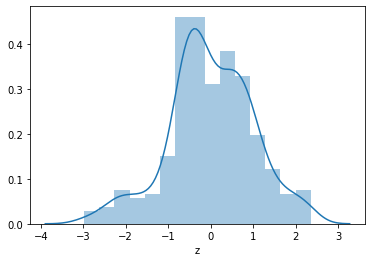

In [46]:
import pandas as pd
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import MetaTrader5 as mt5
import numpy as np
from sklearn.linear_model import LinearRegression
from arch.unitroot import ADF
import seaborn as sns
if not mt5.initialize(path="C:\Program Files\MetaTrader 5\\terminal64.exe"):
    print("initialize() failed, error code =", mt5.last_error())
    quit()
symbols = ['EURUSD', 'GBPUSD', 'USDJPY', 'USDCHF', 'AUDUSD', 'NZDUSD', 'USDCAD', 'AUDCAD', 'AUDCHF', 'AUDJPY','AUDNZD', 
           'CADCHF', 'CADJPY', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURNZD','GBPAUD', 'GBPCAD', 
           'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDJPY', 'NZDCAD', 'NZDCHF']
micro = True
if micro:
    for i in range(len(symbols)):
        symbols[i] += "micro"
dependente = symbols[1]
independente = symbols[2]
df = pd.DataFrame()
dep = mt5.copy_rates_from_pos(dependente, mt5.TIMEFRAME_H4, 1, 300)
indep = mt5.copy_rates_from_pos(independente, mt5.TIMEFRAME_H4, 1, 300)
df[dependente] = [y[4] for y in dep]
df[independente] = [y[4] for y in indep]
x = df[independente].values.reshape(-1,1)
y = df[dependente].values.reshape(-1,1)
reg = LinearRegression().fit(x, y)
resultado = reg.predict(x)
#print(np.mean(resultado))
coef = reg.coef_[0][0]
intercept = reg.intercept_[0]
df['previsao'] = df[dependente] * coef + intercept
df['residuo'] = df[independente] - df['previsao']
media = df['residuo'].mean()
dp = df['residuo'].std()
df['z'] = (df['residuo'] - media)/dp
media = df['z'].mean()
dp = df['z'].std()
q5 = media + 1.96 * dp
q95 = media - 1.96 * dp
print(df.describe())
#df['z'].plot()

print(q5, q95)

sns.distplot(df['z'], bins = 15)

In [37]:
a = np.array([1,2,3])
a = a -5
a = np.append(a, [1,2,3])
a

array([-4, -3, -2,  1,  2,  3])

In [30]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.regression.linear_model import OLSResults
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
#print(results.summary())
predictions = results.get_prediction(x)
frame = predictions.summary_frame()
print(frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0    1.312052  0.000340       1.311384       1.312721      1.302317   
1    1.314950  0.000370       1.314223       1.315678      1.305210   
2    1.313449  0.000354       1.312753       1.314145      1.303711   
3    1.314420  0.000364       1.313704       1.315136      1.304681   
4    1.313994  0.000359       1.313287       1.314702      1.304256   
..        ...       ...            ...            ...           ...   
295  1.295561  0.000302       1.294966       1.296156      1.285830   
296  1.294261  0.000311       1.293650       1.294873      1.284529   
297  1.293918  0.000313       1.293302       1.294534      1.284185   
298  1.293455  0.000317       1.292832       1.294078      1.283722   
299  1.293701  0.000315       1.293082       1.294320      1.283968   

     obs_ci_upper  
0        1.321788  
1        1.324691  
2        1.323187  
3        1.324159  
4        1.323733  
..            ...  
295    

In [4]:
import pandas as pd


a = pd.DataFrame([1,2,3])
a.iloc[:,0]

0    1
1    2
2    3
Name: 0, dtype: int64

In [6]:
matriz = [[1,2,3], [3,4,5], [6,7,8]]

matriz_eliminada = matriz[1:]
matriz_eliminada

[[3, 4, 5], [6, 7, 8]]